# Analyse sentiment predictions from NLTK, Transformers and PowerBI

### Concolusion
- All in all Transformers performs best followed by PowerBI then NLTK
- NLTK has better recall of the positive class, but is that statistically significant?

### Notes
- Treated score of 0 as a positive sentiment when discretizing scores to labels

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('../output/2-nltk-transformers-powerbi.csv')
display(df.shape)
df.tail(3)

(2961, 6)

,Source,Text,GT,NLTK,Transformers,PowerBI
2958,yelp,You never know if you pushed it hard enough or...,0,0.0516,-0.995305,0.096820
2959,yelp,You won't regret it!,1,0.3867,0.999130,0.237188
2960,yelp,You'll love how thin it is.,1,0.6369,-0.991778,0.947443


<AxesSubplot:>

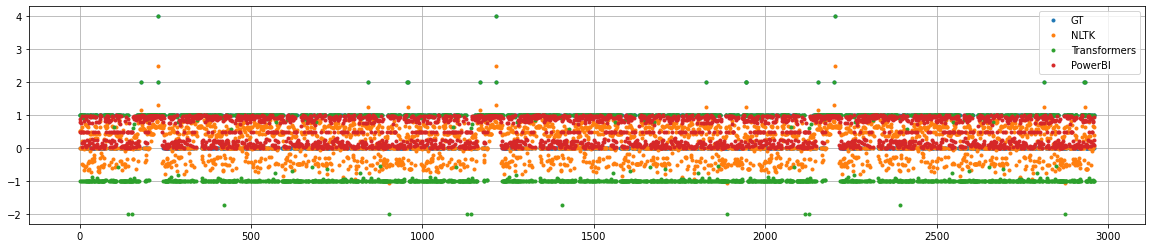

In [3]:
df[['GT', 'NLTK', 'Transformers', 'PowerBI']].plot(figsize=(20,4), grid=True, style='.')

### Create Labels

In [4]:
df['NLTK Label'] = df.NLTK.apply(lambda x: 0 if x <0 else 1)
df['Transformers Label'] = df.Transformers.apply(lambda x: 0 if x <0 else 1)
df['PowerBI Label'] = df.PowerBI.apply(lambda x: 0 if x <0.5 else 1)
df['GT Label'] = df.GT.apply(lambda x: 0 if x==0 else 1)
df.head(3)

,Source,Text,GT,NLTK,Transformers,PowerBI,NLTK Label,Transformers Label,PowerBI Label,GT Label
0,amazon,!I definitly recommend!!,1,0.5229,0.999602,0.800973,1,1,1,1
1,amazon,#1 It Works - #2 It is Comfortable.,1,0.5106,0.999836,0.873062,1,1,1,1
2,amazon,$50 Down the drain.,0,0.0000,-0.995299,0.500000,1,0,1,0


### Compute Metrics

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score

def computeMetrics(method, y_true, y_pred):
    return {
        'Method': method,
        'Accuracy': accuracy_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),


        
    }

metrics = pd.DataFrame([
    computeMetrics('NLTK', df['GT Label'], df['NLTK Label']),
    computeMetrics('Transformers', df['GT Label'], df['Transformers Label']),
    computeMetrics('PowerBI', df['GT Label'], df['PowerBI Label']),

    
])

metrics.sort_values('MCC')

,Method,Accuracy,MCC,F1,Precision,Recall
0,NLTK,0.756839,0.569720,0.798995,0.678521,0.971487
2,PowerBI,0.792300,0.594702,0.808590,0.746552,0.881874
1,Transformers,0.924012,0.848214,0.922760,0.933333,0.912424


In [6]:
metrics

,Method,Accuracy,MCC,F1,Precision,Recall
0,NLTK,0.756839,0.569720,0.798995,0.678521,0.971487
1,Transformers,0.924012,0.848214,0.922760,0.933333,0.912424
2,PowerBI,0.792300,0.594702,0.808590,0.746552,0.881874


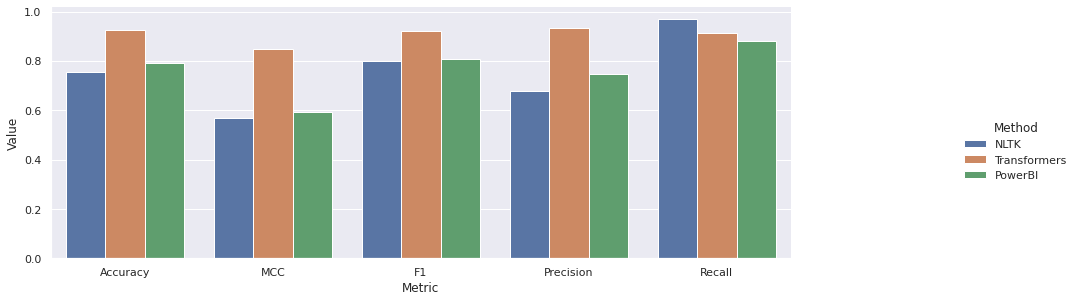

In [8]:
# Plot
metrics2 = (
    pd.melt(metrics, id_vars=['Method'], value_vars=['Accuracy', 'MCC', 'F1', 'Precision', 'Recall'])
    .rename(columns={'variable': 'Metric', 'value': 'Value'})
)

g = sns.catplot(data = metrics2, x='Metric', y='Value', hue='Method', kind='bar')
sns.set_theme()
g.fig.set_figwidth(16)
g.fig.set_figheight(4)
